# Stock price prediction using Machine Learning

In [8]:
# import pip
# pip.main(["install","yfinance"])

# Importing needful libraries

In [127]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Importing data

In [128]:
df=yf.download("AAPL",start="2010-01-01",end="2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [129]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200


# Setting data

In [70]:
df=df["Close"].to_frame()
df.head()

,Close
Date,
2009-12-31,7.526071
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714


# Sliding window

In [71]:
df["Close in 10 changes"]=df["Close"].shift(-10) #Here the window is 10 changes

In [72]:
df.head(20)

,Close,Close in 10 changes
Date,,
2009-12-31,7.526071,7.354643
2010-01-04,7.643214,7.680000
2010-01-05,7.656429,7.561786
2010-01-06,7.534643,7.431071
2010-01-07,7.520714,7.062500
2010-01-08,7.570714,7.252500
2010-01-11,7.503929,7.355000
2010-01-12,7.418571,7.424286
2010-01-13,7.523214,7.117500


In [73]:
dfc=df.iloc[:-10,:]

In [5]:
df.reset_index(inplace=True)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200


# Machine Learning

In [75]:
x=dfc.iloc[:,0].values.reshape(dfc.shape[0],1)
y=dfc.iloc[:,1].values

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [77]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.7729046648787683

# Forcasting

In [131]:
y_act_10=dfc.iloc[-10:,:]["Close in 10 changes"].values
y_act_10

array([69.96499634, 70.10250092, 69.93499756, 70.00499725, 69.86000061,
       71.        , 71.06749725, 72.47750092, 72.44999695, 72.87999725])

In [132]:
y_pred_10=rf.predict(dfc.iloc[-10:,:]["Close"].values.reshape(10,1))

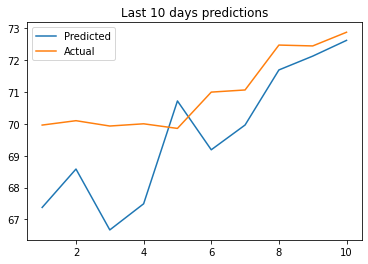

In [133]:
plt.plot(range(1,11),y_pred_10)
plt.plot(range(1,11),y_act_10)
plt.legend(["Predicted","Actual"])
plt.title("Last 10 days predictions")
plt.show()